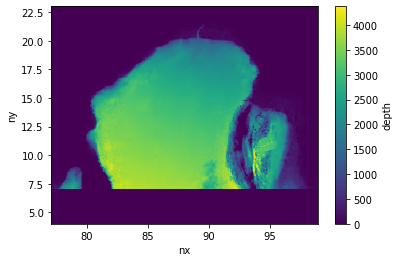

In [38]:
import os
import xarray as xr
import numpy as np

os.chdir("/home/nma/mom/MOM6dev/exps/regional2/INPUT/"
        )

topo = xr.open_dataset("pytopog.nc")

topo_vals = topo.depth

os.chdir("/home/nma/mom/MOM6dev/exps/regional2/INPUT/")

supe_grid = xr.open_dataset("bob_grid.nc")

lon,lat = np.unique(supe_grid.x.values),np.unique(supe_grid.y.values)

n_lon,n_lat = lon[::2],lat[::2]

n_lonss = []
n_latss = []
for ii in range(len(n_lon)):
    n_lonss += [(n_lon[ii-1] + n_lon[ii])/2]

for jj in range(len(n_lat)):
    n_latss += [(n_lat[jj-1] + n_lat[jj])/2]

new_lons,new_lats = n_lonss[1:],n_latss[1:]

n_topo = topo.assign_coords({"ny":(new_lats)})
n_topo_final = n_topo.assign_coords({"nx":(new_lons)})


test_topo = xr.where(n_topo_final.ny < 7.1,0,n_topo_final)

test_topo.depth.plot()
#n_topo_final.depth.plot()

test_topo.to_netcdf("/home/nma/mom/MOM6dev/exps/regional2/INPUT/test_topo.nc")